# Regresión Lineal: Costo de un indicidente de seguridad

En este ejrcicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso muy sencillo relacionado a con la Cibersegrudidad

## Enunciado del ejercicio
El ejercicio consiste en predecir el costo de un insidente de seguridad en base al número de equipos que se han visto afectado. El lconjunto de datos es aleatoría.

## 1. Generación del DataSet

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # Va a tener un distribución normal lineal (randn) seudo-aleatorio porque no existe la aleatoriedad

print('La longitud del DataSet es: ', len(X))

La longitud del DataSet es:  100


## 2. Visualización del DataSet

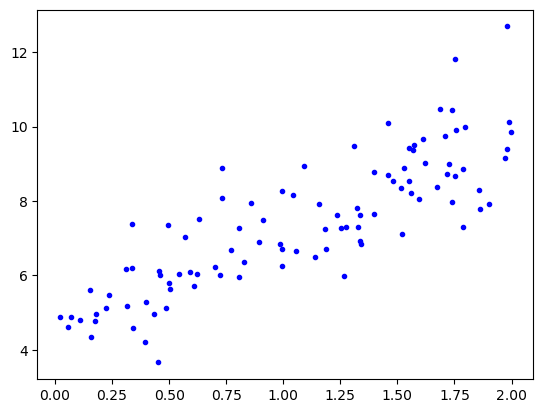

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X, y, 'b.')
plt.show()

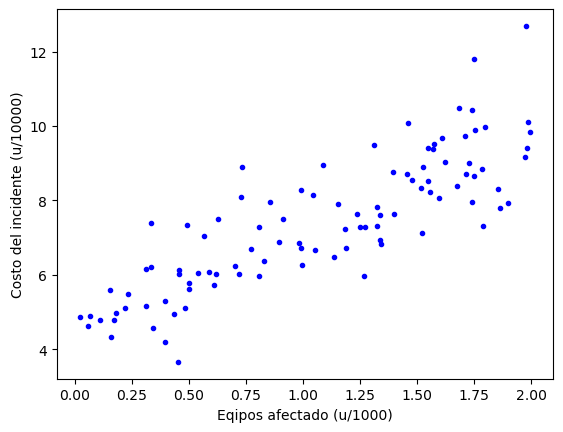

In [3]:
plt.plot(X, y, 'b.')
plt.xlabel("Eqipos afectado (u/1000)")
plt.ylabel("Costo del incidente (u/10000)")
plt.show()

## 3. Modificación del DataSet

In [4]:
import pandas as pd

data = {"No_Equipos_Afectados": X.flatten(), 'Costo': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,1.478734,8.544956
1,0.234463,5.477748
2,1.520645,7.116023
3,1.980996,9.410913
4,0.179857,4.962807
5,0.827918,6.357837
6,0.722232,6.017294
7,0.610043,5.716346
8,0.056565,4.623678
9,0.620580,6.024173


In [5]:
# Escalado del Número de equipos afectados
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype('int')

# Escalado del Costo
df['Costo'] = df['Costo'] * 10000
df['Costo'] = df['Costo'].astype('int')

df.head(10)

,No_Equipos_Afectados,Costo
0,1478,85449
1,234,54777
2,1520,71160
3,1980,94109
4,179,49628
5,827,63578
6,722,60172
7,610,57163
8,56,46236
9,620,60241


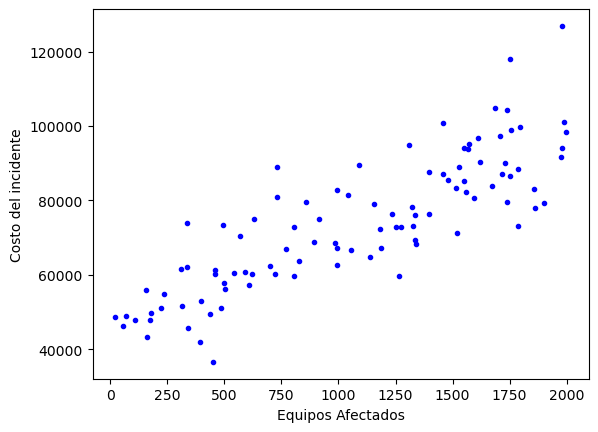

In [6]:
# Representación gráfica del DataSet

plt.plot(df['No_Equipos_Afectados'], df['Costo'], 'b.')
plt.xlabel('Equipos Afectados')
plt.ylabel('Costo del incidente')
plt.show()

## 4. Construcción del Modelo

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
# Contruir el modelo de ajuste de la función de hipótesis

lin_reg = LinearRegression()
lin_reg.fit (df['No_Equipos_Afectados'].values.reshape(-1, 1), df['Costo'].values)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
# Parametro Theta 0

lin_reg.intercept_

np.float64(46400.848503230685)

In [10]:
# Parametro Theta 1

lin_reg.coef_

array([25.74700789])

In [11]:
# Predicción para el valor mínimo y máximo del DataSet de entrenamiento

X_min_max = np.array([[df['No_Equipos_Afectados'].min()], [df['No_Equipos_Afectados'].max()]])
y_train_pred = lin_reg.predict(X_min_max)

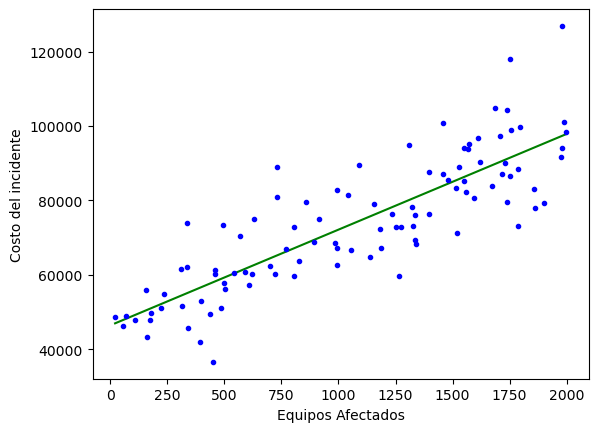

In [12]:
# Representación gráfica de la función de hipótesis generada

plt.plot(X_min_max, y_train_pred, 'g-')
plt.plot(df['No_Equipos_Afectados'], df['Costo'], 'b.')
plt.xlabel('Equipos Afectados')
plt.ylabel('Costo del incidente')
plt.show()

## 5. Predicción de nuevos ejemplos

In [13]:
x_new = np.array([[1350]]) # 1350 equipos afectados

# La predicción del costo que tendría el incidente
costo = lin_reg.predict(x_new)

print('El costo del incidente para 1350 equipos sería: $', int(costo[0],))

El costo del incidente para 1350 equipos sería: $ 81159


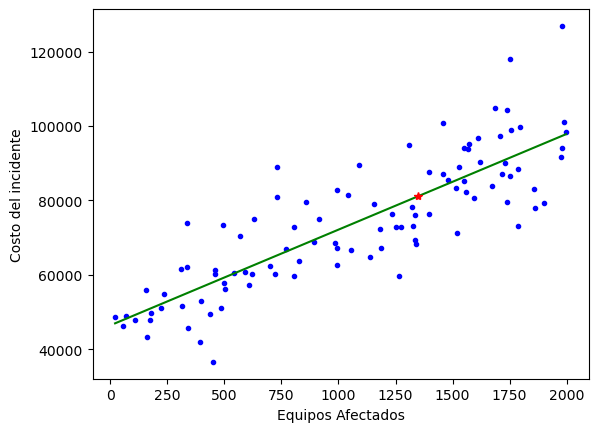

In [14]:
# Representación gráfica de nuevos ejemplos

plt.plot(df['No_Equipos_Afectados'], df['Costo'], 'b.')
plt.plot(X_min_max, y_train_pred, 'g-')
plt.plot(x_new, costo, 'r*')
plt.xlabel('Equipos Afectados')
plt.ylabel('Costo del incidente')
plt.show()